#Convolutional Neural Network (CNN)

The CNN design that we are going to implement is pretty basic with only one convolutional layer as follows.


* Convolutional layer with 32 filters of size 5x5 with stride=1 and padding = 0 and ReLU activation
* Pooling layer taking the max over 2x2 patches
* Dropout layer with probability = 0.2
* Fully connected layer of 128 neurons and ReLU activation
* Output layer of 10 neurons


#Import what is needed

In [19]:
import torch
import torchvision.transforms as transform
import torch.nn.functional as F
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import datasets

seed = 7
torch.manual_seed(seed)
torch.backends.cudnn.deterministic=True



#Download data, transform and set DataLoaders

In [20]:
transformCustom = transform.Compose([
      transform.ToTensor()
    ]) #Q: why we don't need to flatten the images into a vector here unlike MLP ?

train = MNIST(root=".",train=True, download=True, transform=transformCustom)
test = MNIST(root=".", train=False, download=True, transform=transformCustom)

train_loader = DataLoader(train, batch_size=128, shuffle=True)
test_loader = DataLoader(test, batch_size=128, shuffle=True)

#Define the CNN model 

In [21]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1,out_channels=32,kernel_size=(5,5),padding=0) #find out what is conv1d, conv2d, conv3d
    self.fullyConnected1 = nn.Linear(in_features=32*12*12, out_features=128)
    self.fullyConnected2 = nn.Linear(in_features=128, out_features=10)

  def forward(self,x):
    out = self.conv1(x)
    out = F.relu(out)
    out = F.max_pool2d(out,(2,2))  
    out = F.dropout(out,0.2)
    out = out.view(out.shape[0],-1) 
    out = self.fullyConnected1(out)
    out = F.relu(out)
    out = self.fullyConnected2(out) 
    return out

#Implement CNN using nn.Sequential 
class CNN_seq(nn.Module):
  def __init__(self):
    super(CNN_seq,self).__init__()
    self.conv1 = nn.Sequential(
    nn.Conv2d(in_channels=1,out_channels=32,kernel_size=(5,5),padding=0),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Dropout(0.2))


    self.conv2 = nn.Sequential()

    self.fullyConnected1 = nn.Linear(in_features=32*12*12, out_features=128)
    self.fullyConnected2 = nn.Linear(in_features=128, out_features=10)

  def forward(self,x):
    out = self.conv1(x)
    out = out.view(out.shape[0],-1) 

    out = self.fullyConnected1(out)
    out = F.relu(out)
    out = self.fullyConnected2(out)

    return out

#Train and learn

During training
  * Pass the output of CNN as raw logits(linear function)
  * Calculate cross entropy (grd truth vs predicted output). Here softmax
and cross entropy is computed
  * Back propagate cross entropy loss
  * Update the weights accordingly



In [22]:
model=CNN()
#model=CNN_seq()


#Set loss and optimiser 
loss_fn = nn.CrossEntropyLoss()

optimiser = optim.Adam(model.parameters())


model.train()
epochSize=5
for epoch in range(epochSize):
  
  for batch_id, (input,target) in enumerate(train_loader):

    optimiser.zero_grad() 
    output = model(input) #forward 
 
    loss = loss_fn(output,target)
    
    
    loss.backward() #back prop
    optimiser.step()#update weights

    if batch_id%100==0:
      print(f'Epoch:{epoch}/{epochSize} Batch:{batch_id+1} Loss:{loss.item()}')

    




Epoch:0/5 Batch:1 Loss:2.2992801666259766
Epoch:0/5 Batch:101 Loss:0.32525306940078735
Epoch:0/5 Batch:201 Loss:0.2901872396469116
Epoch:0/5 Batch:301 Loss:0.10267605632543564
Epoch:0/5 Batch:401 Loss:0.10840160399675369
Epoch:1/5 Batch:1 Loss:0.07736755162477493
Epoch:1/5 Batch:101 Loss:0.03943421319127083
Epoch:1/5 Batch:201 Loss:0.1366945207118988
Epoch:1/5 Batch:301 Loss:0.10726448148488998
Epoch:1/5 Batch:401 Loss:0.031344179064035416
Epoch:2/5 Batch:1 Loss:0.0628729984164238
Epoch:2/5 Batch:101 Loss:0.03155883401632309
Epoch:2/5 Batch:201 Loss:0.04076959937810898
Epoch:2/5 Batch:301 Loss:0.1718994677066803
Epoch:2/5 Batch:401 Loss:0.09558525681495667
Epoch:3/5 Batch:1 Loss:0.02815227210521698
Epoch:3/5 Batch:101 Loss:0.018841179087758064
Epoch:3/5 Batch:201 Loss:0.01652820035815239
Epoch:3/5 Batch:301 Loss:0.05310704559087753
Epoch:3/5 Batch:401 Loss:0.053767330944538116
Epoch:4/5 Batch:1 Loss:0.011416777968406677
Epoch:4/5 Batch:101 Loss:0.07784360647201538
Epoch:4/5 Batch:201 L


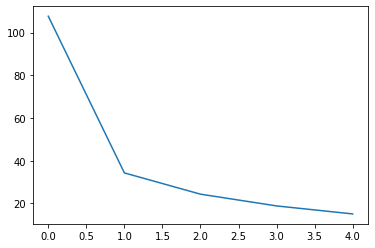


#Evaluation of model against training and test dataset

#Evaluate on training set

60000 samples 

correctly predicted: 59513

accuracy: 0.9918833374977112


In [ ]:
#Your implementation here

#Evaluate on test set
10000 samples

correctly predicted: 9870

accuracy: 0.9869999885559082

In [ ]:
#Your implementation here